In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r'C:\Users\Wasim\Desktop\Data_science_Projects\olx_rent_pred\raw_data\olx_rent_data_new.csv')

In [3]:
data.head()

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
0,Apartments,2,2,Semi-Furnished,700,4000,North-East,6,"Andheri East, Mumbai, Maharashtra","₹ 42,000"
1,Apartments,1,2,Furnished,399,999,East,4,"Andheri East, Mumbai, Maharashtra","₹ 20,000"
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Apartments,1,1,Furnished,550,5500,North-East,3,"Chikhali, Pune, Maharashtra","₹ 5,500"
4,Apartments,2,2,Semi-Furnished,800,1000,East,4,"Model Colony, Nashik, Maharashtra","₹ 15,000"


In [4]:
data.shape

(1200, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type                   1200 non-null   object
 1   bedroom                1200 non-null   object
 2   bathroom               1200 non-null   object
 3   furnishing             1200 non-null   object
 4   Carpet Area (ft²)      1200 non-null   object
 5   Maintenance (Monthly)  1200 non-null   int64 
 6   facing                 1200 non-null   object
 7   Total floor            1200 non-null   int64 
 8   state                  1200 non-null   object
 9   Rent                   1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


In [69]:
data.iloc[640:,:]

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
640,Apartments,3,3,Semi-Furnished,1600,3000,North-East,12,"Gomti Nagar, Lucknow, Uttar Pradesh","₹ 16,000"
641,Builder Floors,3,2,Semi-Furnished,1020,0,North-East,5,"Noida Extension, Noida, Uttar Pradesh","₹ 8,650"
642,Apartments,2,2,Unfurnished,3200,200,South-East,3,"Kursi Road, Lucknow, Uttar Pradesh","₹ 7,500"
643,Apartments,2,2,Unfurnished,1500,3,VDA COLONY PHASE-1 NEAR DR BHIM RAO AMBEDKAR H...,1,"VDA Colony, Varanasi, Uttar Pradesh","₹ 11,000"
644,Apartments,3,3,Furnished,1300,1500,North-West,6,"Sector 104, Noida, Uttar Pradesh","₹ 25,000"
...,...,...,...,...,...,...,...,...,...,...
1195,Apartments,2,2,Semi-Furnished,1000,400,North,2,"Chromepet Radha Nagar, Chennai, Tamil Nadu","₹ 10,000"
1196,Houses & Villas,2,1,Semi-Furnished,650,0,South,2,"Villivakkam North Jagannath Nagar, Chennai, Ta...","₹ 12,000"
1197,Houses & Villas,1,1,Unfurnished,00,0,வணக்கம்,0,"Veerapandi, Tiruppur, Tamil Nadu","₹ 4,000"
1198,Apartments,2,2,Semi-Furnished,1085,2200,North,4,"Arcot Road, Chennai, Tamil Nadu","₹ 22,000"


In [6]:
data['Maintenance (Monthly)'].value_counts()

-1             302
 0             279
 500            79
 1000           45
 100            37
              ... 
 9744114886      1
 2400            1
 335             1
 8500            1
 14000           1
Name: Maintenance (Monthly), Length: 100, dtype: int64

In [7]:
df=data[data['Maintenance (Monthly)']!=-1]

In [8]:
df['Maintenance (Monthly)'].value_counts()

0             279
500            79
1000           45
100            37
2              32
             ... 
80              1
1250            1
2800            1
9744114886      1
1992            1
Name: Maintenance (Monthly), Length: 99, dtype: int64

In [9]:
df.shape

(898, 10)

In [10]:
df=df.drop_duplicates(ignore_index=True)

In [11]:
df.shape

(887, 10)

In [12]:
df.head()

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
0,Apartments,2,2,Semi-Furnished,700,4000,North-East,6,"Andheri East, Mumbai, Maharashtra","₹ 42,000"
1,Apartments,1,2,Furnished,399,999,East,4,"Andheri East, Mumbai, Maharashtra","₹ 20,000"
2,Apartments,1,1,Furnished,550,5500,North-East,3,"Chikhali, Pune, Maharashtra","₹ 5,500"
3,Apartments,2,2,Semi-Furnished,800,1000,East,4,"Model Colony, Nashik, Maharashtra","₹ 15,000"
4,Apartments,3,3,Furnished,1800,2000,East,5,"Serene Meadows, Nashik, Maharashtra","₹ 31,000"


In [13]:
df['Rent'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
df['Rent'] = df['Rent'].astype('int64')

In [14]:
df.Type.value_counts()

Apartments         467
Houses & Villas    315
Builder Floors     105
Name: Type, dtype: int64

In [15]:
df.bedroom.value_counts()

2     429
1     287
3     148
4      14
4+      9
Name: bedroom, dtype: int64

In [16]:
i=df[(df['bedroom']=='4+') ].index

In [17]:
df.loc[i,'bedroom']=5

In [18]:
df['bedroom'] = df['bedroom'].astype('int64')

In [25]:
df.bathroom.value_counts()

2    409
1    359
3    103
4     10
5      6
Name: bathroom, dtype: int64

In [20]:
df.loc[563,'bathroom']=1

In [22]:
i=df[(df['bathroom']=='4+') ].index

In [23]:
df.loc[i,'bathroom']=5

In [24]:
df['bathroom'] = df['bathroom'].astype('int64')

In [26]:
df.furnishing.value_counts()

Semi-Furnished    434
Unfurnished       257
Furnished         194
Owner               1
Builder             1
Name: furnishing, dtype: int64

In [27]:
df[(df['furnishing']=='Owner') | (df['furnishing']=='Builder')]

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
199,Apartments,1,1,Builder,Yes,2,SK APARTMENT,2,"Mekkara, Thrippunithura, Kerala",7000
563,Houses & Villas,2,1,Owner,Yes,1,Sakunthala nilayam,0,"Maragondanahalli, Bengaluru, Karnataka",15000


In [28]:
df.loc[563,'furnishing']='Furnished'

In [29]:
df.loc[199,'furnishing']='Semi-Furnished' #mode value

In [30]:
df.furnishing.value_counts()

Semi-Furnished    435
Unfurnished       257
Furnished         195
Name: furnishing, dtype: int64

In [31]:
df.facing.value_counts()

East                321
North               142
North-East          119
West                 75
South                47
                   ... 
Snowden s Homes       1
Perumanoor            1
Alok properties       1
Sai Amaraa Niaya      1
wellington mews       1
Name: facing, Length: 137, dtype: int64

In [32]:
i=df[(df['facing']!= 'East' )&( df['facing']!='North-East') & (df['facing']!='North') & (df['facing']!='West') & (df['facing']!='South')&( df['facing']!='North-West')&( df['facing']!='South-East')&( df['facing']!='South-West')].index

In [33]:
df.loc[i,'facing']='others'

In [34]:
df.facing.value_counts()

East          321
North         142
others        140
North-East    119
West           75
South          47
North-West     23
South-East     13
South-West      7
Name: facing, dtype: int64

In [35]:
df['Total floor'].value_counts()

2     214
1     155
3     140
4      98
5      46
0      34
7      28
12     19
6      16
15     16
11     13
19     13
14     11
13     11
10     10
8       9
22      8
24      6
17      5
9       5
26      4
25      4
20      4
21      3
16      3
18      3
23      2
30      2
27      2
32      2
28      1
Name: Total floor, dtype: int64

In [36]:
df['Carpet Area (ft²)'].value_counts()

1000    54
800     40
1200    38
600     36
500     33
        ..
1285     1
953      1
1175     1
1759     1
901      1
Name: Carpet Area (ft²), Length: 199, dtype: int64

In [37]:
df[df['Carpet Area (ft²)']=='Yes']

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
191,Apartments,3,3,Unfurnished,Yes,5,others,1,"Mundamveli, Kochi, Kerala",12000
199,Apartments,1,1,Semi-Furnished,Yes,2,others,2,"Mekkara, Thrippunithura, Kerala",7000
563,Houses & Villas,2,1,Furnished,Yes,1,others,0,"Maragondanahalli, Bengaluru, Karnataka",15000


In [38]:
df.loc[[563,199,191],'Carpet Area (ft²)']=np.NaN

In [39]:
df[df['Carpet Area (ft²)']=='No']

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
61,Apartments,1,1,Unfurnished,No,4,others,1,"Keshav Nagar, Pune, Maharashtra",5000


In [40]:
df.loc[61,'Carpet Area (ft²)']=np.NaN

In [41]:
df['Carpet Area (ft²)'] = df['Carpet Area (ft²)'].astype('float64')

In [42]:
df['Carpet Area (ft²)'].max()

7005565310.0

In [43]:
df[df['Carpet Area (ft²)']==7005565310.0]

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
422,Houses & Villas,1,1,Semi-Furnished,7.005565e+09,1,others,1,"Kankarkhera, Meerut, Uttar Pradesh",3800


In [45]:
i=df[df['Carpet Area (ft²)']<100].index

In [46]:
df.loc[i,'Carpet Area (ft²)']=np.NaN

In [44]:
df.loc[422,'Carpet Area (ft²)']=np.NaN

<AxesSubplot:>

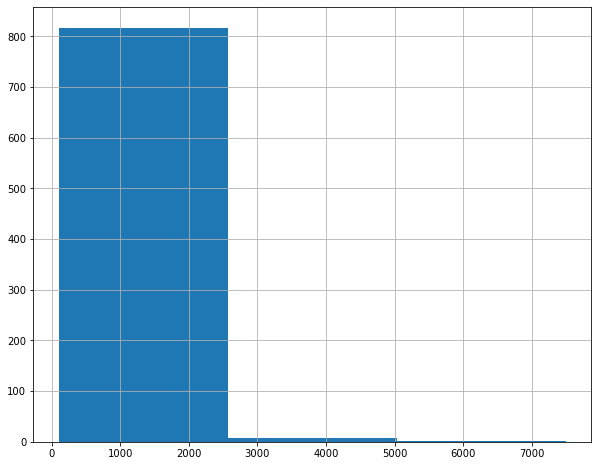

In [47]:
df['Carpet Area (ft²)'].hist(bins=3,figsize=(10,8))

In [48]:
df['state']=df.state.apply(lambda x:x.split(',')[-1])

In [49]:
df.head()

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
0,Apartments,2,2,Semi-Furnished,700.0,4000,North-East,6,Maharashtra,42000
1,Apartments,1,2,Furnished,399.0,999,East,4,Maharashtra,20000
2,Apartments,1,1,Furnished,550.0,5500,North-East,3,Maharashtra,5500
3,Apartments,2,2,Semi-Furnished,800.0,1000,East,4,Maharashtra,15000
4,Apartments,3,3,Furnished,1800.0,2000,East,5,Maharashtra,31000


In [50]:
df['Maintenance (Monthly)'].describe()

count    8.870000e+02
mean     1.098671e+07
std      3.271753e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+02
75%      1.450000e+03
max      9.744115e+09
Name: Maintenance (Monthly), dtype: float64

<AxesSubplot:>

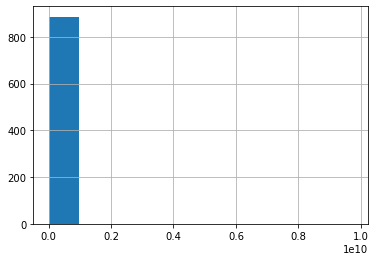

In [51]:
df['Maintenance (Monthly)'].hist()

In [60]:
i=df[(df['Maintenance (Monthly)']<100) &(df['Maintenance (Monthly)']!=0)].index

In [61]:
len(i)

113

In [62]:
df.loc[i,'Maintenance (Monthly)']=np.NaN

In [63]:
df['Maintenance (Monthly)'].value_counts()

0.0        275
500.0       78
1000.0      45
100.0       37
2000.0      31
          ... 
708.0        1
11000.0      1
4700.0       1
875.0        1
40000.0      1
Name: Maintenance (Monthly), Length: 80, dtype: int64

In [66]:
df.head()

,Type,bedroom,bathroom,furnishing,Carpet Area (ft²),Maintenance (Monthly),facing,Total floor,state,Rent
0,Apartments,2,2,Semi-Furnished,700.0,4000.0,North-East,6,Maharashtra,42000
1,Apartments,1,2,Furnished,399.0,999.0,East,4,Maharashtra,20000
2,Apartments,1,1,Furnished,550.0,5500.0,North-East,3,Maharashtra,5500
3,Apartments,2,2,Semi-Furnished,800.0,1000.0,East,4,Maharashtra,15000
4,Apartments,3,3,Furnished,1800.0,2000.0,East,5,Maharashtra,31000


In [67]:
df.to_csv('cleaned_nan_data.csv',index=False)